# IBM Data Science Professional Certificate
## Capstone project

This notebook is created for the capstone project in the course 'Applied Data Science Capstone'. The purpose of the program discribed by this notebook is to use the Foursquare API to explore the neighbourhoods in Singapore and Paris to determine if there are similarities in venues for the largest neighborhoods.

The notebook is split into 3 sections. The first section deals with the loading the required libraries. The second section deals with the scraping the neighbourhood dataset from online sources and processing the dataset to a desired form. The last section deals with the analysis of the data.

### (1) Loading necessary libraries

The following 3 cells imports the necessary libraries. The cells are split according to the intent and use of the libraries. The first cell imports the necessary libraries for data scraping and pre-processing. THe second cell installs geopy if necessary and the last cell imports the libraries necessary for data visualisation and clustering.

In [2]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import json

print('Libraries imported')

Libraries imported


In [ ]:
# The following line of code is for the installation of the necessary libraries.

!pip install geopy
!pip install geocoder

print("Installation Complete")

In [4]:
import json
import geocoder
from  geopy.geocoders import Nominatim
from pandas import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

print('Libraries imported')

Libraries imported


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported')

Libraries imported


In [3]:
url = "https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
table = soup.find('table', class_='wikitable sortable')

In [4]:
# Creating Lists to store data parsed from wikipedia

name = []
region = []
area = []
population = []

# Parsing data to created lists

for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells)==9:
        atag = cells[0].find('a')
        name.append(atag.attrs['title'])
        regtag = cells[5].find('a')
        region.append(regtag.attrs['title'])
        area.append(cells[6].find(text=True))
        population.append(cells[7].find(text=True))
        

In [5]:
# Formatting Dataframe structure

sg_df = pd.DataFrame(name, columns = ['Planning Area'])
sg_df['Region'] = region
sg_df['Area'] = area
sg_df['Population'] = population

# Formatting Data

sg_df['Area'] = sg_df['Area'].str.replace(r'\n', '')
sg_df['Population'] = sg_df['Population'].str.replace(r'\n', '')

# Check Data parsed
print(sg_df.shape)
sg_df

(55, 4)


,Planning Area,Region,Area,Population
0,Ang Mo Kio,"North-East Region, Singapore",13.94,"163,950"
1,Bedok,"East Region, Singapore",21.69,"279,380"
2,"Bishan, Singapore","Central Region, Singapore",7.62,"88,010"
3,Boon Lay Planning Area,"West Region, Singapore",8.23,30
4,Bukit Batok,"West Region, Singapore",11.13,"153,740"
5,Bukit Merah,"Central Region, Singapore",14.34,"151,980"
6,Bukit Panjang,"West Region, Singapore",8.99,"139,280"
7,Bukit Timah,"Central Region, Singapore",17.53,"77,430"
8,Central Water Catchment,"North Region, Singapore",37.15,*
9,Changi,"East Region, Singapore",40.61,"1,830"


In [6]:
#adjusting dataframe

sg_df['Population'] = sg_df['Population'].replace(r'*', '0')
sg_df['Population'] = sg_df['Population'].str.replace(r',', '')
sg_df['Region'] = sg_df['Region'].str.replace(r', Singapore', '')
sg_df['Planning Area'] = sg_df['Planning Area'].str.replace(r', Singapore', '')
sg_df['Planning Area'] = sg_df['Planning Area'].str.replace(r' Planning Area', '')

sg_df

,Planning Area,Region,Area,Population
0,Ang Mo Kio,North-East Region,13.94,163950
1,Bedok,East Region,21.69,279380
2,Bishan,Central Region,7.62,88010
3,Boon Lay,West Region,8.23,30
4,Bukit Batok,West Region,11.13,153740
5,Bukit Merah,Central Region,14.34,151980
6,Bukit Panjang,West Region,8.99,139280
7,Bukit Timah,Central Region,17.53,77430
8,Central Water Catchment,North Region,37.15,0
9,Changi,East Region,40.61,1830


In [7]:
sg_df['Planning Area'][7] = sg_df['Planning Area'][7].replace('Bukit Timah', 'Upper Bukit Timah')
sg_df['Planning Area'][7]

'Upper Bukit Timah'

In [8]:
sgdf2 = sg_df.copy()
sgdf2['Population'] = sgdf2['Population'].astype(int)
sgdf2 = sgdf2[sgdf2.Population >= 1000]

sgdf2

,Planning Area,Region,Area,Population
0,Ang Mo Kio,North-East Region,13.94,163950
1,Bedok,East Region,21.69,279380
2,Bishan,Central Region,7.62,88010
4,Bukit Batok,West Region,11.13,153740
5,Bukit Merah,Central Region,14.34,151980
6,Bukit Panjang,West Region,8.99,139280
7,Upper Bukit Timah,Central Region,17.53,77430
9,Changi,East Region,40.61,1830
11,Choa Chu Kang,West Region,6.11,190890
12,Clementi,West Region,9.49,92420


In [9]:
sgdf2.reset_index(inplace=True, drop=True)
sgdf2

,Planning Area,Region,Area,Population
0,Ang Mo Kio,North-East Region,13.94,163950
1,Bedok,East Region,21.69,279380
2,Bishan,Central Region,7.62,88010
3,Bukit Batok,West Region,11.13,153740
4,Bukit Merah,Central Region,14.34,151980
5,Bukit Panjang,West Region,8.99,139280
6,Upper Bukit Timah,Central Region,17.53,77430
7,Changi,East Region,40.61,1830
8,Choa Chu Kang,West Region,6.11,190890
9,Clementi,West Region,9.49,92420


In [10]:
planArea = sgdf2['Planning Area'].tolist()
print(len(planArea))
planArea[:5]

36


['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah']

In [11]:
i = 0
latitude = []
longitude = []
latlng = []


lat_lng_coords = None
while(lat_lng_coords is None):
    g = geocoder.osm('{}, Singapore, SG'.format(planArea[i]))
    lat_lng_coords = g.latlng
    
latitude.append(lat_lng_coords[0])
longitude.append(lat_lng_coords[1])

print("The geographical coordinates of Ang Mo Kio in Singapore City are {}, {}.".format(latitude, longitude))

The geographical coordinates of Ang Mo Kio in Singapore City are [1.3700803], [103.8495228].


In [12]:
i = 0
latitude = []
longitude = []
latlng = []

while i < len(planArea):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.osm('{}, Singapore, SG'.format(planArea[i]))
        lat_lng_coords = g.latlng
        #print(g.latlng)

    latlng.append(g.latlng)
        
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    i = i+1

    
latlng = pd.DataFrame(latlng, columns = ['Latitude', 'Longitude'])
latlng.head()

,Latitude,Longitude
0,1.370080,103.849523
1,1.323976,103.930216
2,1.350986,103.848255
3,1.349057,103.749591
4,1.270439,103.828318


In [13]:
len(latlng)

36

In [14]:
full = pd.concat([sgdf2, latlng], axis=1, sort=False)
full

,Planning Area,Region,Area,Population,Latitude,Longitude
0,Ang Mo Kio,North-East Region,13.94,163950,1.370080,103.849523
1,Bedok,East Region,21.69,279380,1.323976,103.930216
2,Bishan,Central Region,7.62,88010,1.350986,103.848255
3,Bukit Batok,West Region,11.13,153740,1.349057,103.749591
4,Bukit Merah,Central Region,14.34,151980,1.270439,103.828318
5,Bukit Panjang,West Region,8.99,139280,1.378629,103.762136
6,Upper Bukit Timah,Central Region,17.53,77430,1.329448,103.794166
7,Changi,East Region,40.61,1830,1.351080,103.990064
8,Choa Chu Kang,West Region,6.11,190890,1.384749,103.744534
9,Clementi,West Region,9.49,92420,1.315100,103.765231


In [15]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [16]:
# Create map of Singapore using latitude and longitude values. 

map_sg = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, region, area in zip(full['Latitude'], full['Longitude'], full['Region'], full['Planning Area']):
    label = '{}, {}'.format(area, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  

map_sg

In [17]:
CLIENT_ID = '0NVYTJWC1U3I3NK5VTKB2GP51JMQZVVEZYKIKFUCB2V1HN00' # your Foursquare ID
CLIENT_SECRET = 'LJP3RPBB3DFC4BEPIFX0VKEVPRAFVU4NMMS3Z0IJ0UEYQQ1C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0NVYTJWC1U3I3NK5VTKB2GP51JMQZVVEZYKIKFUCB2V1HN00
CLIENT_SECRET:LJP3RPBB3DFC4BEPIFX0VKEVPRAFVU4NMMS3Z0IJ0UEYQQ1C


Exploring the first neighbourhood to get a sense of the data

In [18]:
full.loc[0, 'Planning Area']

'Ang Mo Kio'

In [19]:
neighborhood_latitude = full.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = full.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = full.loc[0, 'Planning Area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ang Mo Kio are 1.3700803, 103.8495228.


In [20]:
# type your answer here

radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=0NVYTJWC1U3I3NK5VTKB2GP51JMQZVVEZYKIKFUCB2V1HN00&client_secret=LJP3RPBB3DFC4BEPIFX0VKEVPRAFVU4NMMS3Z0IJ0UEYQQ1C&v=20180605&ll=1.3700803,103.8495228&radius=500&limit=100'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f02cd0a6da43a2157e43500'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ang Mo Kio',
  'headerFullLocation': 'Ang Mo Kio, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 40,
  'suggestedBounds': {'ne': {'lat': 1.3745803045000045,
    'lng': 103.85401568693963},
   'sw': {'lat': 1.3655802954999954, 'lng': 103.84502991306037}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc30123abf495215220c393',
       'name': 'Old Chang Kee',
       'location': {'address': 'AMK Hub',
        'crossStreet': '53 Ang Mo Kio Avenue 3',
        'lat': 1.369093882325005,
        'lng': 103.84838865753792,
        'labeledLatLngs':

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Old Chang Kee,Snack Place,1.369094,103.848389
1,FairPrice Xtra,Supermarket,1.369279,103.848886
2,MOS Burger,Burger Joint,1.369170,103.847831
3,NTUC FairPrice,Supermarket,1.371507,103.847082
4,Face Ban Mian 非板面 (Ang Mo Kio),Noodle House,1.372031,103.847504


In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print('There are {} unique category values returned by Foursquare.'.format(nearby_venues['categories'].nunique()))

40 venues were returned by Foursquare.
There are 30 unique category values returned by Foursquare.


In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
sg_venues = getNearbyVenues(names=full['Planning Area'],
                                   latitudes=full['Latitude'],
                                   longitudes=full['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Bukit Batok
Bukit Merah
Bukit Panjang
Upper Bukit Timah
Changi
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Mandai
Marine Parade
Newton
Novena
Outram
Pasir Ris
Punggol
Queenstown
River Valley
Rochor
Sembawang
Sengkang
Serangoon
Singapore River
Southern Islands
Tampines
Tanglin
Toa Payoh
Woodlands
Yishun


In [35]:
print(sg_venues.shape)
sg_venues.head(10)

(1400, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.37008,103.849523,Old Chang Kee,1.369094,103.848389,Snack Place
1,Ang Mo Kio,1.37008,103.849523,FairPrice Xtra,1.369279,103.848886,Supermarket
2,Ang Mo Kio,1.37008,103.849523,MOS Burger,1.369170,103.847831,Burger Joint
3,Ang Mo Kio,1.37008,103.849523,NTUC FairPrice,1.371507,103.847082,Supermarket
4,Ang Mo Kio,1.37008,103.849523,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
5,Ang Mo Kio,1.37008,103.849523,PLAYe,1.369109,103.848225,Hobby Shop
6,Ang Mo Kio,1.37008,103.849523,Subway,1.369136,103.847612,Sandwich Place
7,Ang Mo Kio,1.37008,103.849523,ST31 Coffee Shop,1.367478,103.848334,Coffee Shop
8,Ang Mo Kio,1.37008,103.849523,A&W,1.369541,103.849043,Fast Food Restaurant
9,Ang Mo Kio,1.37008,103.849523,e品红麻辣香锅 Mala Hot Pot,1.371498,103.847803,Asian Restaurant


In [36]:
sg_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ang Mo Kio,40,40,40,40,40,40
Bedok,59,59,59,59,59,59
Bishan,43,43,43,43,43,43
Bukit Batok,22,22,22,22,22,22
Bukit Merah,8,8,8,8,8,8
Bukit Panjang,40,40,40,40,40,40
Changi,5,5,5,5,5,5
Choa Chu Kang,26,26,26,26,26,26
Clementi,63,63,63,63,63,63


In [60]:
print('There are {} uniques categories.'.format(len(sg_venues['Venue Category'].unique())))
uniqueValues = sg_venues['Venue Category'].unique()
#uniqueValues['Neighborhood']

There are 214 uniques categories.


In [39]:
sg_venues['Neighborhood']

0       Ang Mo Kio
1       Ang Mo Kio
2       Ang Mo Kio
3       Ang Mo Kio
4       Ang Mo Kio
           ...    
1395        Yishun
1396        Yishun
1397        Yishun
1398        Yishun
1399        Yishun
Name: Neighborhood, Length: 1400, dtype: object

In [68]:
sg_onehot = []

# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")
print(sg_onehot.info())

# add neighborhood column back to dataframe
sg_onehot = sg_onehot.drop(columns='Neighborhood')
sg_onehot.insert(loc=0, column='Neighborhood', value=sg_venues['Neighborhood'])

# move neighborhood column to the first column
# fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
# sg_onehot = sg_onehot[fixed_columns]

pd.options.display.max_columns = None
sg_onehot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Columns: 214 entries, ATM to Yoga Studio
dtypes: uint8(214)
memory usage: 292.7 KB
None


,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rest Area,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
sg_grouped = sg_onehot.groupby('Neighborhood').mean().reset_index()
print(sg_grouped.shape)
sg_grouped

(35, 214)


,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rest Area,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.025000,0.00000,0.000000,0.000000,0.000000,0.025000,0.025000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.025000,0.000000,0.00,0.050000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.025000,0.000000,0.000000,0.00,0.00,0.100000,0.00000,0.00,0.025000,0.000000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.025000,0.00,0.00000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.025000,0.025000,0.000000,0.025000,0.000,0.000000,0.00,0.025,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.00,0.000000,0.00000,0.025000,0.00000,0.000000,0.000000,0.000000,0.000000,0

In [70]:
num_top_venues = 5

for hood in sg_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sg_grouped[sg_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                 venue  freq
0          Coffee Shop  0.10
1           Food Court  0.08
2         Dessert Shop  0.08
3  Japanese Restaurant  0.05
4      Bubble Tea Shop  0.05


----Bedok----
                 venue  freq
0   Chinese Restaurant  0.07
1          Coffee Shop  0.07
2       Sandwich Place  0.05
3  Japanese Restaurant  0.05
4     Asian Restaurant  0.05


----Bishan----
             venue  freq
0       Food Court  0.12
1      Coffee Shop  0.09
2  Bubble Tea Shop  0.07
3   Ice Cream Shop  0.05
4             Café  0.05


----Bukit Batok----
                venue  freq
0         Coffee Shop  0.18
1  Chinese Restaurant  0.14
2         Bus Station  0.09
3          Food Court  0.09
4    Department Store  0.05


----Bukit Merah----
               venue  freq
0           Bus Stop  0.25
1          Juice Bar  0.12
2       Intersection  0.12
3    Harbor / Marina  0.12
4  French Restaurant  0.12


----Bukit Panjang----
                  venue  freq
0  Fast Food Restauran

In [77]:
df1 = sg_grouped[:1]
df1

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rest Area,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.025,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.05,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.025,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.025,0.0,0.025,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.025,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
pd.pivot_table(df1, index=['Neighborhood'])

,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rest Area,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ang Mo Kio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.025,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.05,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.025,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.025,0.0,0.025,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.025,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.0,0.

In [151]:
pop_df = []
pop_df = full[['Planning Area', 'Population']]
pop_df = pop_df.sort_values(by=['Population'], ascending = False)
pop_df = pop_df.set_index(['Planning Area'])
pop_df = pop_df.head(15)
pop_df

,Population
Planning Area,
Bedok,279380
Jurong West,264860
Tampines,256730
Woodlands,254730
Sengkang,244600
Hougang,226240
Yishun,220320
Choa Chu Kang,190890
Punggol,170560


In [119]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Bedok to Ang Mo Kio
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  10 non-null     int32
dtypes: int32(1)
memory usage: 120.0+ bytes


In [135]:
pop_df[:2]

,Population
Planning Area,
Bedok,279380
Jurong West,264860


In [152]:
pop_df['Population'] = pd.to_numeric(pop_df['Population'])

pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Bedok to Toa Payoh
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  15 non-null     int32
dtypes: int32(1)
memory usage: 180.0+ bytes


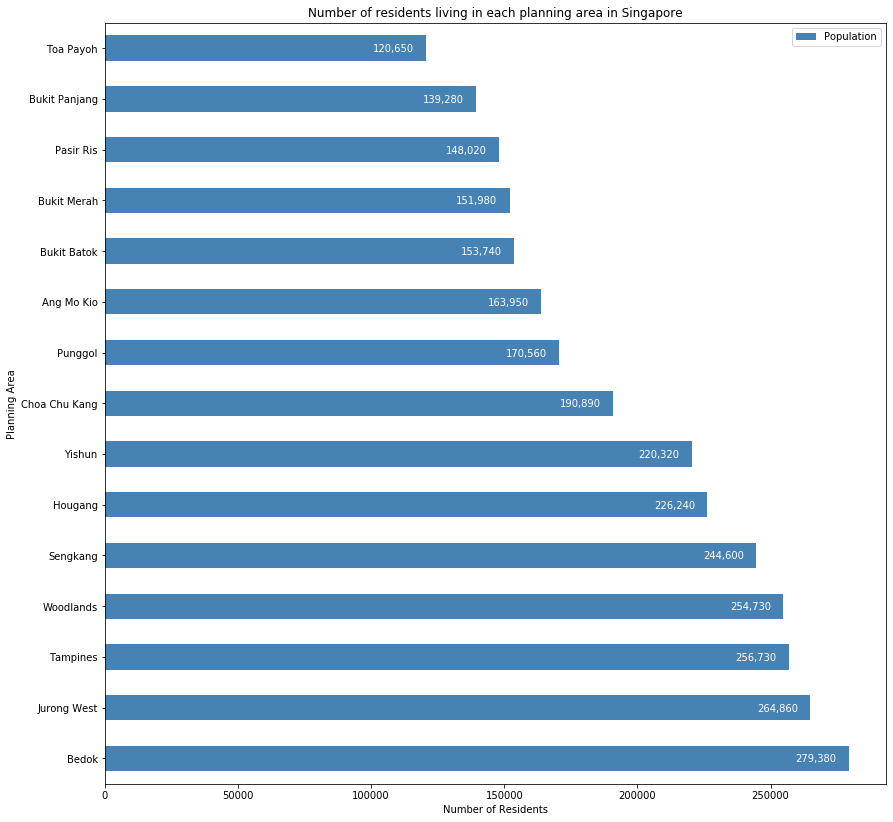

In [163]:
pop_df.plot(kind='barh', figsize=(14, 14), color='steelblue')
plt.xlabel('Number of Residents')
plt.title('Number of residents living in each planning area in Singapore')

for index, value in enumerate(pop_df['Population']):
    label = format(int(value), ",")
    plt.annotate(label, xy=(value-20000, index-0.07), color='white')
    

plt.show()

In [170]:
venue_grp = sg_onehot.groupby('Neighborhood').sum().reset_index()
venue_grp

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bay,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Lounge,Macanese Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,Night Market,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rest Area,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bedok,0,0,0,1,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,2,0,0,0,0,4,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,Bishan,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0,0,4,0,0,0,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,

In [169]:
cafe_df = []
cafe_df = venue_grp[['Neighborhood', 'Café']]
cafe_df = cafe_df.sort_values(by=['Café'], ascending = False)
cafe_df = cafe_df.set_index(['Neighborhood'])
cafe_df = cafe_df.head(15)
cafe_df

,Café
Neighborhood,
Novena,7
Tampines,6
Woodlands,4
Jurong East,4
Choa Chu Kang,3
Downtown Core,3
Bishan,2
Rochor,2
Bukit Panjang,2


In [171]:
jp_res_df = []
jp_res_df = venue_grp[['Neighborhood', 'Japanese Restaurant']]
jp_res_df = jp_res_df.sort_values(by=['Japanese Restaurant'], ascending = False)
jp_res_df = jp_res_df.set_index(['Neighborhood'])
jp_res_df = jp_res_df.head(15)
jp_res_df

,Japanese Restaurant
Neighborhood,
Jurong West,8
Singapore River,8
Jurong East,6
Woodlands,4
Marine Parade,4
Downtown Core,3
Bedok,3
Clementi,2
Ang Mo Kio,2


In [219]:
fr_travel_data = pd.read_csv(r'C:\Users\invic\Dropbox\studies\1. Coursera\9. Applied Data Science Capstone\travel_data_France.csv', error_bad_lines=False)
fr_travel_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,824000.0,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,425000.0,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,NaN
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2191000.0,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0,NaN
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1808000.0,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,NaN


In [196]:
fr_travel_data.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
1961              264
1962              264
1963              264
1964              264
1965              264
1966              264
1967              264
1968              264
1969              264
1970              264
1971              264
1972              264
1973              264
1974              264
1975              264
1976              264
1977              264
1978              264
1979              264
1980              264
1981              264
1982              264
1983              264
1984              264
1985              264
1986              264
1987              264
1988              264
1989              264
1990              264
1991              264
1992              264
1993              264
1994              264
1995               48
1996               43
1997               42
1998               39
1999               40
2000               36
2001      

In [220]:
fr_travel_data['Total'] = fr_travel_data.sum(axis=1)
fr_travel_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0,NaN,19631500.0
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,NaN,6015000.0
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0,NaN,35871000.0
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,NaN,51357000.0


In [198]:
fr_travel_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Total'],
      dtype='object')

In [221]:
fr_travel_data = fr_travel_data.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
                            '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
                            '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
                            '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994'])
fr_travel_data = fr_travel_data[(fr_travel_data['Country Name']==lst)]
fr_travel_data = fr_travel_data.reset_index(drop=True)
fr_travel_data.head()

ValueError: Can only compare identically-labeled Series objects

In [200]:
sg_travel = fr_travel_data.loc[fr_travel_data['Country Name']=='Singapore']

sg_travel =sg_travel.set_index(['Country Name'])
sg_travel = sg_travel.drop(columns=['Total'])
sg_travel = sg_travel.transpose()
sg_travel = sg_travel.dropna()
sg_travel['Singapore'] = sg_travel['Singapore'].astype(int)

sg_travel

Country Name,Singapore
1995,6070000
1996,6048000
1997,5894000
1998,5122000
1999,5604000
2000,6062000
2001,5857000
2002,5855000
2003,4703000
2004,6553000


Text(0.5, 0, 'Years')

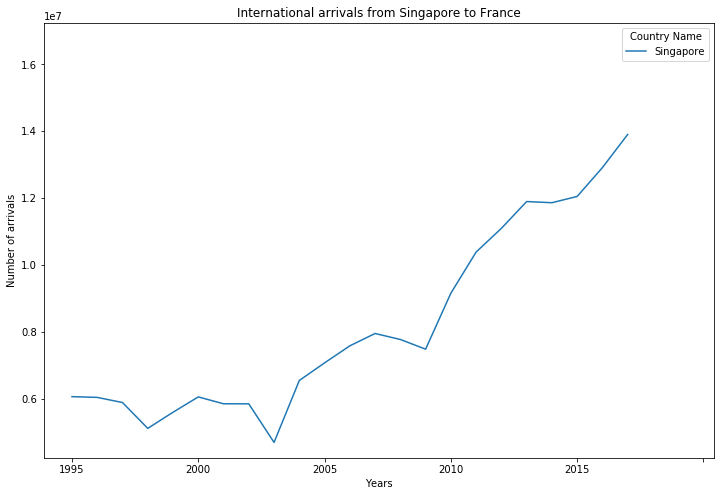

In [300]:
sg_travel[0:len(sg_travel)-1].plot(kind='line', figsize=(12, 8))

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin, xmax*1.1)
plt.ylim(ymin, ymax*1.2)
#plt.ticklabel_format(style='plain')
#plt.xticks(np.arange(xmin, xmax*1.1, 0.1))

plt.title('International arrivals from Singapore to France')
plt.ylabel('Number of arrivals')
plt.xlabel('Years')

In [202]:
years = list(map(str, range(1995, 2019)))
print(years)

sg_travel1 = fr_travel_data.loc[fr_travel_data['Country Name']=='Singapore', years]
sg_travel1

['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
206,6070000.0,6048000.0,5894000.0,5122000.0,5604000.0,6062000.0,5857000.0,5855000.0,4703000.0,6553000.0,...,7488000.0,9161000.0,10390000.0,11098000.0,11899000.0,11864000.0,12051000.0,12913000.0,13903000.0,14673000.0


In [203]:
country_data = pd.read_csv(r'C:\Users\invic\Dropbox\studies\1. Coursera\9. Applied Data Science Capstone\Metadata_Country.csv') # , error_bad_lines=False
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,Country
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [204]:
country_data = pd.DataFrame(country_data)
print(country_data.columns)
country_data = country_data.drop(['SpecialNotes'], axis=1)
country_data = country_data.dropna()
print(country_data.shape)
country_data.info()

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'Country'], dtype='object')
(217, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  217 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   217 non-null    object
 3   Country       217 non-null    object
dtypes: object(4)
memory usage: 8.5+ KB


In [205]:
country_data = country_data[(country_data['Region']=='East Asia & Pacific') & (country_data['IncomeGroup']=='High income')]
country_data = country_data.reset_index(drop=True)

In [223]:
country_data = country_data.rename(columns={"Country": "Country Name"})
country_data

,Country Code,Region,IncomeGroup,Country Name
0,AUS,East Asia & Pacific,High income,Australia
1,BRN,East Asia & Pacific,High income,Brunei Darussalam
2,GUM,East Asia & Pacific,High income,Guam
3,HKG,East Asia & Pacific,High income,"Hong Kong SAR, China"
4,JPN,East Asia & Pacific,High income,Japan
5,KOR,East Asia & Pacific,High income,"Korea, Rep."
6,MAC,East Asia & Pacific,High income,"Macao SAR, China"
7,MNP,East Asia & Pacific,High income,Northern Mariana Islands
8,NCL,East Asia & Pacific,High income,New Caledonia
9,NRU,East Asia & Pacific,High income,Nauru


In [207]:
fr_travel_data[fr_travel_data['Country Name']=='Singapore']

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
206,Singapore,6070000.0,6048000.0,5894000.0,5122000.0,5604000.0,6062000.0,5857000.0,5855000.0,4703000.0,...,10390000.0,11098000.0,11899000.0,11864000.0,12051000.0,12913000.0,13903000.0,14673000.0,NaN,203610000.0


In [266]:
travel_fr=[]
years = list(map(str, range(1995, 2019)))
travel_fr = pd.merge(country_data, fr_travel_data, how='inner', on='Country Name', sort=False)
travel_fr = travel_fr.drop(['Country Code', 'Region', 'IncomeGroup'], axis=1)
travel_fr = travel_fr.fillna(0)
travel_fr.columns = list(map(str, travel_fr.columns))
#travel_fr = travel_fr.astype(int)
travel_fr[years] = travel_fr[years].astype(int)
travel_fr['Total'] = travel_fr.sum(axis=1).astype(int)
travel_fr

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Australia,3726000,4165000,4318000,4167000,4459000,4931000,4856000,4841000,4746000,...,5771000,6032000,6482000,6922000,7449000,8269000,8815000,9246000,0.0,275902000
1,Brunei Darussalam,0,0,0,0,0,0,0,0,0,...,242000,209000,225000,201000,218000,219000,259000,278000,0.0,6060000
2,Guam,1362000,1373000,1382000,1137000,1162000,1287000,1159000,1059000,910000,...,1160000,1308000,1334000,1343000,1409000,1536000,1545000,1549000,0.0,60464000
3,"Hong Kong SAR, China",0,0,0,7137000,7837000,8814000,8878000,10689000,9676000,...,22316000,23770000,25661000,27770000,26686000,26553000,27884000,29263000,0.0,757334000
4,Japan,3345000,3837000,4218000,4106000,4438000,4757000,4772000,5239000,5212000,...,6219000,8358000,10364000,13413000,19737000,24040000,28691000,31192000,0.0,468474000
5,"Korea, Rep.",3753000,3684000,3908000,4250000,4660000,5322000,5147000,5347000,4753000,...,9795000,11140000,12176000,14202000,13232000,17242000,13336000,15347000,0.0,390490000
6,"Macao SAR, China",4202000,4690000,3836000,4517000,5050000,5197000,5842000,6565000,6309000,...,12925000,13577000,14268000,14566000,14308000,15703600,17255000,18493000,0.0,482415200
7,Northern Mariana Islands,669000,728000,685000,481000,493000,517000,438000,466000,452000,...,336000,399000,436000,455000,475100,526000,656000,517000,0.0,23348200
8,New Caledonia,86000,91000,105000,104000,100000,110000,101000,104000,102000,...,112000,112000,108000,107000,114000,116000,121000,120000,0.0,5038000
9,Nauru,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [263]:
travel_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  14 non-null     object 
 1   1995          14 non-null     int32  
 2   1996          14 non-null     int32  
 3   1997          14 non-null     int32  
 4   1998          14 non-null     int32  
 5   1999          14 non-null     int32  
 6   2000          14 non-null     int32  
 7   2001          14 non-null     int32  
 8   2002          14 non-null     int32  
 9   2003          14 non-null     int32  
 10  2004          14 non-null     int32  
 11  2005          14 non-null     int32  
 12  2006          14 non-null     int32  
 13  2007          14 non-null     int32  
 14  2008          14 non-null     int32  
 15  2009          14 non-null     int32  
 16  2010          14 non-null     int32  
 17  2011          14 non-null     int32  
 18  2012          14 non-null     in

In [284]:
top15_df = travel_fr.sort_values(by='Total', ascending=False).head(10)
top15_df = top15_df.drop(['Total', '2019'], axis=1)
top15_df = top15_df.set_index('Country Name')
top15_df

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
"Hong Kong SAR, China",0,0,0,7137000,7837000,8814000,8878000,10689000,9676000,13655000,...,16926000,20085000,22316000,23770000,25661000,27770000,26686000,26553000,27884000,29263000
"Macao SAR, China",4202000,4690000,3836000,4517000,5050000,5197000,5842000,6565000,6309000,8324000,...,10402000,11926000,12925000,13577000,14268000,14566000,14308000,15703600,17255000,18493000
Japan,3345000,3837000,4218000,4106000,4438000,4757000,4772000,5239000,5212000,6138000,...,6790000,8611000,6219000,8358000,10364000,13413000,19737000,24040000,28691000,31192000
Singapore,6070000,6048000,5894000,5122000,5604000,6062000,5857000,5855000,4703000,6553000,...,7488000,9161000,10390000,11098000,11899000,11864000,12051000,12913000,13903000,14673000
"Korea, Rep.",3753000,3684000,3908000,4250000,4660000,5322000,5147000,5347000,4753000,5818000,...,7818000,8798000,9795000,11140000,12176000,14202000,13232000,17242000,13336000,15347000
Australia,3726000,4165000,4318000,4167000,4459000,4931000,4856000,4841000,4746000,5215000,...,5490000,5790000,5771000,6032000,6482000,6922000,7449000,8269000,8815000,9246000
New Zealand,0,0,0,1475000,1596000,1780000,1900000,2026000,2086000,2325000,...,2373000,2435000,2511000,2473000,2629000,2772000,3039000,3370000,3555000,3686000
Guam,1362000,1373000,1382000,1137000,1162000,1287000,1159000,1059000,910000,1160000,...,1053000,1197000,1160000,1308000,1334000,1343000,1409000,1536000,1545000,1549000
Northern Mariana Islands,669000,728000,685000,481000,493000,517000,438000,466000,452000,525000,...,345000,375000,336000,399000,436000,455000,475100,526000,656000,517000


In [285]:
top15_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Hong Kong SAR, China to Nauru
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1995    14 non-null     int32
 1   1996    14 non-null     int32
 2   1997    14 non-null     int32
 3   1998    14 non-null     int32
 4   1999    14 non-null     int32
 5   2000    14 non-null     int32
 6   2001    14 non-null     int32
 7   2002    14 non-null     int32
 8   2003    14 non-null     int32
 9   2004    14 non-null     int32
 10  2005    14 non-null     int32
 11  2006    14 non-null     int32
 12  2007    14 non-null     int32
 13  2008    14 non-null     int32
 14  2009    14 non-null     int32
 15  2010    14 non-null     int32
 16  2011    14 non-null     int32
 17  2012    14 non-null     int32
 18  2013    14 non-null     int32
 19  2014    14 non-null     int32
 20  2015    14 non-null     int32
 21  2016    14 non-null     int32
 22  2017    14 non-null     int32
 23  

In [286]:
top15_df = top15_df.transpose()
top15_df

Country Name,"Hong Kong SAR, China","Macao SAR, China",Japan,Singapore,"Korea, Rep.",Australia,New Zealand,Guam,Northern Mariana Islands,French Polynesia,Brunei Darussalam,New Caledonia,Palau,Nauru
1995,0,4202000,3345000,6070000,3753000,3726000,0,1362000,669000,172000,0,86000,53000,0
1996,0,4690000,3837000,6048000,3684000,4165000,0,1373000,728000,164000,0,91000,69000,0
1997,0,3836000,4218000,5894000,3908000,4318000,0,1382000,685000,180000,0,105000,74000,0
1998,7137000,4517000,4106000,5122000,4250000,4167000,1475000,1137000,481000,189000,0,104000,64000,0
1999,7837000,5050000,4438000,5604000,4660000,4459000,1596000,1162000,493000,211000,0,100000,55000,0
2000,8814000,5197000,4757000,6062000,5322000,4931000,1780000,1287000,517000,252000,0,110000,58000,0
2001,8878000,5842000,4772000,5857000,5147000,4856000,1900000,1159000,438000,228000,0,101000,54000,0
2002,10689000,6565000,5239000,5855000,5347000,4841000,2026000,1059000,466000,189000,0,104000,59000,0
2003,9676000,6309000,5212000,4703000,4753000,4746000,2086000,910000,452000,213000,0,102000,63000,0
2004,13655000,8324000,6138000,6553000,5818000,5215000,2325000,1160000,525000,212000,119000,100000,89000,0


In [288]:

top15_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1996 to 2018
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Hong Kong SAR, China      23 non-null     int32
 1   Macao SAR, China          23 non-null     int32
 2   Japan                     23 non-null     int32
 3   Singapore                 23 non-null     int32
 4   Korea, Rep.               23 non-null     int32
 5   Australia                 23 non-null     int32
 6   New Zealand               23 non-null     int32
 7   Guam                      23 non-null     int32
 8   Northern Mariana Islands  23 non-null     int32
 9   French Polynesia          23 non-null     int32
 10  Brunei Darussalam         23 non-null     int32
 11  New Caledonia             23 non-null     int32
 12  Palau                     23 non-null     int32
 13  Nauru                     23 non-null     int32
dtypes: int32(14)
memory usage: 1.4+ KB


Text(0.5, 0, 'Years')

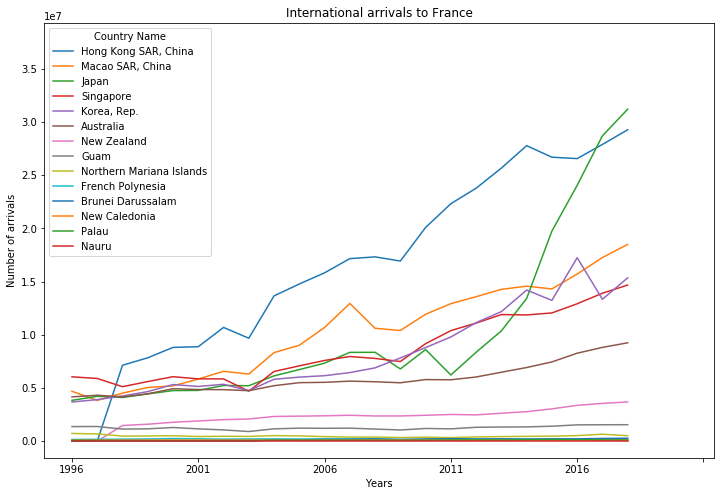

In [289]:
top15_df.plot(kind='line', figsize=(12, 8))

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin, xmax*1.1)
plt.ylim(ymin, ymax*1.2)
#plt.ticklabel_format(style='plain')

plt.title('International arrivals to France')
plt.ylabel('Number of arrivals')
plt.xlabel('Years')

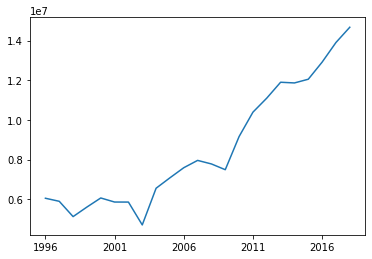

In [291]:
sg_arrivals = top15_df['Singapore']
sg_arrivals.plot(kind='line')

In [115]:
travel_fr[years].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 262
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  202 non-null    object 
 1   1995     202 non-null    float64
 2   1996     202 non-null    float64
 3   1997     202 non-null    float64
 4   1998     202 non-null    float64
 5   1999     202 non-null    float64
 6   2000     202 non-null    float64
 7   2001     202 non-null    float64
 8   2002     202 non-null    float64
 9   2003     202 non-null    float64
 10  2004     202 non-null    float64
 11  2005     202 non-null    float64
 12  2006     202 non-null    float64
 13  2007     202 non-null    float64
 14  2008     202 non-null    float64
 15  2009     202 non-null    float64
 16  2010     202 non-null    float64
 17  2011     202 non-null    float64
 18  2012     202 non-null    float64
 19  2013     202 non-null    float64
 20  2014     202 non-null    float64
 21  2015     202 non

In [56]:
fr_travel_data.fillna(0)

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Aruba,619000.00,641000.00,650000.0,647000.00,683000.00,721000.00,691000.00,643000.00,642000.00,...,869000.00,904000.0,979000.00,1072000.00,1225000.00,1102000.0,1070500.00,1082000.0,0.0,1.963150e+07
2,Angola,9000.00,21000.00,45000.0,52000.00,45000.00,51000.00,67000.00,91000.00,107000.00,...,481000.00,528000.0,650000.00,595000.00,592000.00,397000.0,261000.00,218000.0,0.0,6.015000e+06
3,Albania,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2469000.00,3156000.0,2857000.00,3341000.00,3784000.00,4070000.0,4643000.00,5340000.0,0.0,3.587100e+07
4,Andorra,0.00,0.00,0.0,0.00,2347000.00,2949000.00,3516000.00,3387000.00,3138000.00,...,2242000.00,2238000.0,2328000.00,2363000.00,2663000.00,2819000.0,3003000.00,3042000.0,0.0,5.135700e+07
5,Arab World,22858871.13,23733141.06,25708996.4,28265206.56,32442075.63,36338661.48,37120451.62,41532534.59,43474946.08,...,76660005.53,84844588.3,85114141.13,90876674.14,88169233.28,87721747.5,94181175.87,101463695.3,0.0,1.486124e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,68000.00,73000.00,68000.0,78000.00,85000.00,88000.00,88000.00,89000.00,92000.00,...,121000.00,126000.0,116000.00,120400.00,128000.00,134000.0,146000.00,164000.0,0.0,2.573400e+06
260,"Yemen, Rep.",61000.00,74000.00,80000.0,88000.00,58000.00,73000.00,76000.00,98000.00,155000.00,...,829000.00,874000.0,990000.00,1017500.00,366700.00,0.0,0.00,0.0,0.0,1.053520e+07
261,South Africa,4488000.00,4915000.00,4976000.0,5732000.00,5890000.00,5872000.00,5787000.00,6430000.00,6505000.00,...,8339000.00,9188000.0,9537000.00,9549000.00,8904000.00,10044000.0,10285000.00,10472000.0,0.0,1.831250e+08
262,Zambia,163000.00,264000.00,341000.0,362000.00,404000.00,457000.00,492000.00,565000.00,413000.00,...,920000.00,859000.0,915000.00,947000.00,932000.00,956000.0,1083000.00,1072000.0,0.0,1.632000e+07


In [62]:
top15_df = fr_travel_data.sort_values(by='Total', ascending=False).head(30)
top15_df.reset_index(drop=True)

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,World,5.329531e+08,5.655941e+08,5.951034e+08,6.132370e+08,6.386022e+08,6.896460e+08,6.905135e+08,7.111415e+08,7.016989e+08,...,1.013077e+09,1.070183e+09,1.122921e+09,1.177080e+09,1.227874e+09,1.271882e+09,1.363216e+09,1.441953e+09,NaN,2.166586e+10
1,High income,3.916460e+08,4.077911e+08,4.280389e+08,4.422299e+08,4.596004e+08,4.873320e+08,4.782634e+08,4.844168e+08,4.772469e+08,...,6.215161e+08,6.477424e+08,6.815995e+08,7.235329e+08,7.603812e+08,7.982830e+08,8.465875e+08,8.797195e+08,NaN,1.396779e+10
2,OECD members,3.646053e+08,3.797893e+08,3.967028e+08,4.097650e+08,4.217757e+08,4.469996e+08,4.358780e+08,4.398774e+08,4.337027e+08,...,5.548004e+08,5.726239e+08,6.025702e+08,6.409674e+08,6.768575e+08,7.009425e+08,7.539127e+08,7.912849e+08,NaN,1.257467e+10
3,Post-demographic dividend,3.332715e+08,3.484514e+08,3.707929e+08,3.831918e+08,3.965962e+08,4.236167e+08,4.200695e+08,4.278245e+08,4.222801e+08,...,5.501434e+08,5.759068e+08,6.069027e+08,6.275672e+08,6.572281e+08,6.965805e+08,7.426609e+08,7.733657e+08,NaN,1.226284e+10
4,Europe & Central Asia,3.002922e+08,3.179389e+08,3.425413e+08,3.529832e+08,3.612710e+08,3.898366e+08,3.908934e+08,4.025312e+08,4.051171e+08,...,5.162326e+08,5.411821e+08,5.692493e+08,5.829949e+08,6.086564e+08,6.215985e+08,6.751305e+08,7.125925e+08,NaN,1.137653e+10
5,European Union,2.414403e+08,2.505010e+08,2.669856e+08,2.788278e+08,2.893515e+08,3.078721e+08,3.054866e+08,3.099773e+08,3.109154e+08,...,3.692610e+08,3.792860e+08,3.966820e+08,4.173160e+08,4.389920e+08,4.591460e+08,4.961710e+08,5.195712e+08,NaN,8.444379e+09
6,IDA & IBRD total,1.677734e+08,1.851129e+08,1.958660e+08,1.986388e+08,2.047430e+08,2.291724e+08,2.374691e+08,2.503176e+08,2.494850e+08,...,4.222336e+08,4.555008e+08,4.756250e+08,4.886548e+08,5.058072e+08,5.148134e+08,5.617976e+08,6.103049e+08,NaN,8.437615e+09
7,Low & middle income,1.372642e+08,1.533914e+08,1.624094e+08,1.662259e+08,1.740364e+08,1.971311e+08,2.073870e+08,2.219887e+08,2.198004e+08,...,3.861457e+08,4.169969e+08,4.355518e+08,4.472090e+08,4.605702e+08,4.658074e+08,5.089506e+08,5.557028e+08,NaN,7.568104e+09
8,IBRD only,1.542494e+08,1.696990e+08,1.791054e+08,1.806880e+08,1.861975e+08,2.094755e+08,2.167054e+08,2.279381e+08,2.260991e+08,...,3.754580e+08,4.046055e+08,4.217780e+08,4.311897e+08,4.428089e+08,4.520656e+08,4.929731e+08,5.324298e+08,NaN,7.522465e+09
9,Middle income,1.323331e+08,1.478453e+08,1.565887e+08,1.601209e+08,1.677780e+08,1.896216e+08,1.995038e+08,2.130135e+08,2.107219e+08,...,3.663405e+08,3.956773e+08,4.133839e+08,4.244820e+08,4.375698e+08,4.424012e+08,4.837436e+08,5.267419e+08,NaN,7.206158e+09


# Paris data, pre-processing and basic analysis

In [4]:
url1 = "https://en.wikipedia.org/wiki/Quarters_of_Paris"
page1 = urllib.request.urlopen(url1)
soup1 = BeautifulSoup(page1, 'lxml')
table1 = soup1.find('table', class_='wikitable centre')
table1

<table class="wikitable centre">
<tbody><tr>
<th><a href="/wiki/Arrondissements_of_Paris" title="Arrondissements of Paris">Arrondissement</a><br/>(Districts)
</th>
<th colspan="2">Quartiers<br/>(Quarters)
</th>
<th>Population in<br/>1999<sup class="reference" id="cite_ref-APUR_3-0"><a href="#cite_note-APUR-3">[3]</a></sup>
</th>
<th>Area<br/>(hectares)<sup class="reference" id="cite_ref-APUR_3-1"><a href="#cite_note-APUR-3">[3]</a></sup>
</th>
<th>Map
</th></tr>
<tr>
<td rowspan="4"><a href="/wiki/1st_arrondissement_of_Paris" title="1st arrondissement of Paris">1st arrondissement</a><br/>(Called "du Louvre")
</td>
<td align="right">1st</td>
<td><a class="new" href="/w/index.php?title=Quartier_Saint-Germain-l%27Auxerrois&amp;action=edit&amp;redlink=1" title="Quartier Saint-Germain-l'Auxerrois (page does not exist)">Saint-Germain-l'Auxerrois</a></td>
<td align="right">1,672</td>
<td align="right">86.9
</td>
<td rowspan="4"><a class="image" href="/wiki/File:Quartiers_of_Paris_01er_arrondi

In [ ]:
# Creating Lists to store data parsed from wikipedia

name = []
arrondissement = []
area = []
population = []

# Parsing data to created lists

for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells)==8:
        atag = cells[0].find('a')
        arrondissement.append(str(atag.attrs['title']))
        name.append(cells[1].find(text=True))
        area.append(cells[2].find(text=True))
        population.append(cells[4].find(text=True))
        

In [ ]:
# Creating Lists to store data parsed from wikipedia

name = []
arrondissement = []
area = []
population = []
ars = []

# Parsing data to created lists

for row in table1.find_all('tr'):
    cells = row.find_all('td')
    i = 0
    if len(cells)==6:
        atag = cells[0].find('a')
        arrondissement.append(str(atag.attrs['title']))
        ntag = cells[2].find('a')
        name.append(str(ntag.find(text=True)))
        area.append(cells[4].find(text=True))
        population.append(cells[3].find(text=True))
        i+1
        ars = str(atag.attrs['title'])
    
    if len(cells)==4:
        ntag = cells[1].find('a')
        name.append(str(ntag.find(text=True)))
        area.append(cells[3].find(text=True))
        population.append(cells[2].find(text=True))
        arrondissement.append(ars)
        

In [ ]:
paris_df2 = pd.DataFrame(name, columns = ['Name'])
paris_df2['Arrondissement'] = arrondissement
paris_df2['Area'] = area
paris_df2['Population'] = population

# Check Data parsed
print(paris_df2.shape)
paris_df2.head(5)

In [ ]:
# Processing dataframe

paris_df2['Arrondissement'] = [sub.replace('arrondissement of Paris', 'Arrondissement') for sub in paris_df2['Arrondissement']]
#paris_df2['Name'] = [sub.replace(' (page does not exist)', '') for sub in paris_df2['Name']]
paris_df2['Area'] = [sub.replace('\n', '') for sub in paris_df2['Area']]
paris_df2['Population'] = [sub.replace(',', '') for sub in paris_df2['Population']]
paris_df2['Population'] = paris_df2['Population'].astype(int)
paris_df2['Name'] = paris_df2['Name'].astype(str)
paris_df2['Arrondissement'] = paris_df2['Arrondissement'].astype(str)
paris_df2['Area'] = [sub.replace(',', '.') for sub in paris_df2['Area']]
paris_df2['Area'] = paris_df2['Area'].astype(float)

paris_df2

In [ ]:
latitude = []
longitude = []
latlng = []


lat_lng_coords = None
while(lat_lng_coords is None):
    g = geocoder.osm('{}, Paris, FR'.format(name[1]))
    lat_lng_coords = g.latlng
    
latitude.append(lat_lng_coords[0])
longitude.append(lat_lng_coords[1])

print("The geographical coordinates of {} in Paris are {}, {}.".format(name[1], latitude, longitude))

In [ ]:
i = 0
latitude1 = []
longitude1 = []
latlng1 = []

while i < len(name):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.osm('{}, Paris, FR'.format(name[i]))
        lat_lng_coords = g.latlng
        # print(g.latlng)

    latlng1.append(g.latlng)
        
    latitude1.append(lat_lng_coords[0])
    longitude1.append(lat_lng_coords[1])
    i = i+1

    
latlng1 = pd.DataFrame(latlng1, columns = ['Latitude', 'Longitude'])
latlng1.head()

In [ ]:
full2 = pd.concat([paris_df2, latlng1], axis=1, sort=False)
full2

In [ ]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="fr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

In [ ]:
# Create map of Paris using latitude and longitude values. 

map_paris1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, region, name in zip(full2['Latitude'], full2['Longitude'], full2['Arrondissement'], full2['Name']):
    label = '{}, {}'.format(name, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris1)  

map_paris1

In [ ]:
CLIENT_ID = '0NVYTJWC1U3I3NK5VTKB2GP51JMQZVVEZYKIKFUCB2V1HN00' # your Foursquare ID
CLIENT_SECRET = 'LJP3RPBB3DFC4BEPIFX0VKEVPRAFVU4NMMS3Z0IJ0UEYQQ1C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
full2.loc[0, 'Name']

In [ ]:
neighborhood_latitude = full2.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = full2.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = full2.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

In [ ]:
# Finding venues at the neighborhoods
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

In [ ]:
results = requests.get(url).json()
results

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
paris_venues = getNearbyVenues(names=full2['Name'],
                                   latitudes=full2['Latitude'],
                                   longitudes=full2['Longitude']
                                  )

In [ ]:
print(paris_venues.shape)
paris_venues.head(10)

In [ ]:
paris_venues.groupby('Neighborhood').count()

In [ ]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

In [ ]:
paris_venues['Venue Category'].unique()

In [ ]:
paris_venues.info()

In [ ]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_data = paris_venues['Neighborhood'].copy()
paris_data = pd.DataFrame(paris_data)
paris_onehot.insert(0, paris_data, True)

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

pd.options.display.max_columns = None
paris_onehot.head()